In [70]:
import mysql.connector as conn
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [71]:
df =pd.read_csv('walmart.csv')

In [72]:
df.shape

(999, 20)

In [73]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000
mean,54.441752,5.484484,14.724475,309.213985,294.489510,4.761905e+00,14.724475,5.486687
std,25.876688,2.850572,10.800430,226.809025,216.008595,6.131501e-14,10.800430,2.633759
min,10.020000,1.000000,0.616500,12.946500,12.330000,4.761905e+00,0.616500,1.000000
25%,32.220000,3.000000,5.905250,124.010250,118.105000,4.761905e+00,5.905250,3.100000
50%,54.610000,5.000000,12.065000,253.365000,241.300000,4.761905e+00,12.065000,5.500000
75%,77.715000,8.000000,21.377000,448.917000,427.540000,4.761905e+00,21.377000,7.800000
max,99.920000,10.000000,47.500000,997.500000,950.000000,4.761905e+00,47.500000,10.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               999 non-null    object 
 1   Branch                   999 non-null    object 
 2   City                     999 non-null    object 
 3   Customer type            999 non-null    object 
 4   Customer_name            999 non-null    object 
 5   Gender                   999 non-null    object 
 6   Product line             999 non-null    object 
 7   Unit price               999 non-null    float64
 8   Quantity                 999 non-null    int64  
 9   Tax 5%                   999 non-null    float64
 10  Total                    999 non-null    float64
 11  Date                     999 non-null    object 
 12  Time                     999 non-null    object 
 13  Payment                  999 non-null    object 
 14  cogs                     9

In [75]:
df.nunique()

Invoice ID                 999
Branch                       5
City                        20
Customer type                2
Customer_name              196
Gender                       2
Product line                 7
Unit price                 936
Quantity                    10
Tax 5%                     980
Total                      980
Date                       884
Time                       993
Payment                      4
cogs                       980
gross margin percentage      1
gross income               980
Rating                      91
Male                       100
Female                     100
dtype: int64

In [76]:

df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Customer_name              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Male                       0
Female                     0
dtype: int64

In [77]:
cn_var = conn.connect(host = "localhost", user = "root", password = "")
cursor = cn_var.cursor(buffered = True)

In [78]:
cursor.execute('show databases')
cursor.fetchall()

[('employee',),
 ('glassdb',),
 ('imdb',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('saleswalmart',),
 ('sffilmlocations',),
 ('sys',)]

In [79]:
cursor.execute('create database if not exists SalesWalmart')

In [80]:
cursor.execute('show databases')
cursor.fetchall()

[('employee',),
 ('glassdb',),
 ('imdb',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('saleswalmart',),
 ('sffilmlocations',),
 ('sys',)]

In [81]:
cursor.execute('use saleswalmart')

In [83]:
cursor.execute('create table if not exists saleswalmart.wmsales(invoice_id varchar(50) not null primary key, branch varchar(5) not null, city varchar(30), customer_type varchar(50) not null, customer_name varchar(50) not null, gender varchar(50) not null, product_line varchar(50) not null, unit_price decimal(10,2) not null, quantity int not null, vat float(6,4) not null, total decimal(12,4) not null, date datetime not null, time TIME not null, payment_method varchar(30) not null, cogs decimal(10,2) not null, gross_margin_pct float(11,9), gross_income decimal(12,4) not null, rating float(2,1),male varchar(50) not null,female varchar(50) not null)')

In [84]:
cursor.execute('select * from saleswalmart.wmsales')
cursor.fetchall()

[('101-05-3971',
  'C',
  'Surat',
  'Member',
  'Keshav Sharma',
  'Male',
  'Books',
  Decimal('72.53'),
  4,
  14.506,
  Decimal('304.6260'),
  datetime.datetime(2019, 3, 12, 0, 0),
  datetime.timedelta(seconds=29270),
  'Credit Card',
  Decimal('290.12'),
  4.761904716,
  Decimal('14.5060'),
  5.9,
  'Govind Tiwari',
  'Ujala Kapoor',
  None),
 ('101-06-0084',
  'C',
  'Vadodara',
  'Member',
  'Lucky Singh',
  'Male',
  'Electronic accessories',
  Decimal('96.79'),
  2,
  9.679,
  Decimal('203.2590'),
  datetime.datetime(2017, 2, 5, 0, 0),
  datetime.timedelta(seconds=73237),
  'Walmart Gift Cards',
  Decimal('193.58'),
  4.761904716,
  Decimal('9.6790'),
  1.1,
  'Chetan Kumar',
  'Urvashi Joshi',
  None),
 ('101-31-0777',
  'C',
  'Vishakhapatnam',
  'Member',
  'Farhan Khan',
  'Male',
  'Sports and travel',
  Decimal('63.84'),
  6,
  19.152,
  Decimal('402.1920'),
  datetime.datetime(2020, 11, 21, 0, 0),
  datetime.timedelta(seconds=5292),
  'Credit Card',
  Decimal('383.04'),

In [85]:
cursor.execute('SELECT Customer_name,Customer_type,payment_method FROM wmsales')
cursor.fetchall()

[('Keshav Sharma', 'Member', 'Credit Card'),
 ('Lucky Singh', 'Member', 'Walmart Gift Cards'),
 ('Farhan Khan', 'Member', 'Credit Card'),
 ('Lavisha Kapoor', 'Member', 'Credit Card'),
 ('Yuvraj Yadav', 'Normal', 'Cash'),
 ('Hrishikesh Kapoor', 'Normal', 'Credit Card'),
 ('Pari Chauhan', 'Member', 'Walmart Gift Cards'),
 ('Zara Tiwari', 'Normal', 'Ewallet'),
 ('Govind Tiwari', 'Normal', 'Ewallet'),
 ('Mohan Patel', 'Member', 'Ewallet'),
 ('Rithika Joshi', 'Normal', 'Walmart Gift Cards'),
 ('Himanshu Kapoor', 'Member', 'Credit Card'),
 ('Veda Singh', 'Member', 'Walmart Gift Cards'),
 ('Lucky Singh', 'Member', 'Credit Card'),
 ('Aryan Gupta', 'Normal', 'Credit Card'),
 ('Bhavika Kapoor', 'Normal', 'Cash'),
 ('Omkar Mehta', 'Member', 'Cash'),
 ('Harsh Joshi', 'Member', 'Walmart Gift Cards'),
 ('Aaradhya Yadav', 'Member', 'Walmart Gift Cards'),
 ('Ojasvi Tiwari', 'Normal', 'Walmart Gift Cards'),
 ('Kunal Gupta', 'Member', 'Ewallet'),
 ('Kanika Singh', 'Normal', 'Cash'),
 ('Govind Tiwari', '

Update


In [86]:
cursor.execute('UPDATE wmsales SET city = "pune" WHERE invoice_Id = "100-22-2158"')
cn_var.commit()

Delete

In [87]:
cursor.execute('DELETE FROM wmsales WHERE invoice_Id = "100-22-2158"')
cn_var.commit()

Products sold in each City

In [88]:
cursor.execute('SELECT COUNT(invoice_Id), city FROM wmsales GROUP BY City')
cursor.fetchall()

[(55, 'Surat'),
 (45, 'Vadodara'),
 (45, 'Vishakhapatnam'),
 (54, 'Nashik'),
 (46, 'Jaipur'),
 (65, 'Chennai'),
 (53, 'Agra'),
 (35, 'Chandigarh'),
 (37, 'Lucknow'),
 (63, 'Mumbai'),
 (52, 'New Delhi'),
 (48, 'Bhopal'),
 (45, 'Indore'),
 (46, 'Pune'),
 (53, 'Nagpur'),
 (40, 'Hyderabad'),
 (48, 'Bangalore'),
 (63, 'Ahmedabad'),
 (55, 'Kochi'),
 (48, 'Kolkata')]

In [89]:
cursor.execute('SELECT COUNT(invoice_Id), city FROM wmsales GROUP BY City ORDER BY COUNT(invoice_Id) ASC')
cursor.fetchall()

[(35, 'Chandigarh'),
 (37, 'Lucknow'),
 (40, 'Hyderabad'),
 (45, 'Vadodara'),
 (45, 'Vishakhapatnam'),
 (45, 'Indore'),
 (46, 'Jaipur'),
 (46, 'Pune'),
 (48, 'Bhopal'),
 (48, 'Bangalore'),
 (48, 'Kolkata'),
 (52, 'New Delhi'),
 (53, 'Agra'),
 (53, 'Nagpur'),
 (54, 'Nashik'),
 (55, 'Surat'),
 (55, 'Kochi'),
 (63, 'Mumbai'),
 (63, 'Ahmedabad'),
 (65, 'Chennai')]

Sum of gross income

In [90]:
cursor.execute('SELECT SUM(gross_income) from wmsales')
cursor.fetchall()

[(Decimal('14652.5675'),)]

Average Of gross Income

In [91]:
cursor.execute('SELECT avg(gross_income) from wmsales')
cursor.fetchall()

[(Decimal('14.71141315'),)]

View

In [92]:
cursor.execute('CREATE VIEW my_view AS SELECT customer_name,city FROM wmsales')
cursor.execute('SELECT * FROM my_view')
cursor.fetchall()

ProgrammingError: 1050 (42S01): Table 'my_view' already exists

In [93]:
cursor.execute('SELECT customer_name,gender from wmsales')
cursor.fetchall()

[('Keshav Sharma', 'Male'),
 ('Lucky Singh', 'Male'),
 ('Farhan Khan', 'Male'),
 ('Lavisha Kapoor', 'Female'),
 ('Yuvraj Yadav', 'Male'),
 ('Hrishikesh Kapoor', 'Male'),
 ('Pari Chauhan', 'Female'),
 ('Zara Tiwari', 'Female'),
 ('Govind Tiwari', 'Male'),
 ('Mohan Patel', 'Male'),
 ('Rithika Joshi', 'Female'),
 ('Himanshu Kapoor', 'Male'),
 ('Veda Singh', 'Female'),
 ('Lucky Singh', 'Male'),
 ('Aryan Gupta', 'Male'),
 ('Bhavika Kapoor', 'Female'),
 ('Omkar Mehta', 'Male'),
 ('Harsh Joshi', 'Male'),
 ('Aaradhya Yadav', 'Female'),
 ('Ojasvi Tiwari', 'Female'),
 ('Kunal Gupta', 'Male'),
 ('Kanika Singh', 'Female'),
 ('Govind Tiwari', 'Male'),
 ('Urvashi Joshi', 'Female'),
 ('Karan Joshi', 'Male'),
 ('Kavya Rajput', 'Female'),
 ('Raghav Patel', 'Male'),
 ('Ujala Kapoor', 'Female'),
 ('Zayd Khan', 'Male'),
 ('Eshaan Kapoor', 'Female'),
 ('Kaushal Yadav', 'Male'),
 ('Prisha Khan', 'Female'),
 ('Jhanvi Mehta', 'Female'),
 ('Mohit Sahu', 'Male'),
 ('Anushka Yadav', 'Female'),
 ('Sanika Verma', 

Pivot

In [94]:
cursor.execute('SELECT customer_type,SUM(CASE WHEN gender = "male" THEN quantity ELSE 0 END) AS male,SUM(CASE WHEN gender = "female" THEN quantity ELSE 0 END) AS female FROM wmsales GROUP BY customer_type')
cursor.fetchall()

[('Member', Decimal('1424'), Decimal('1344')),
 ('Normal', Decimal('1305'), Decimal('1383'))]

count of Product Line

In [95]:
cursor.execute('SELECT product_line, count(product_line) as cnt from wmsales group by product_line order by cnt')
cursor.fetchall()

[('Health and beauty', 134),
 ('Home and lifestyle', 134),
 ('Clothing', 135),
 ('Electronic accessories', 140),
 ('Books', 141),
 ('Sports and travel', 154),
 ('Food and beverages', 158)]

C:\Users\manth\AppData\Local\Temp\ipykernel_15640\1609959238.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cn_var)


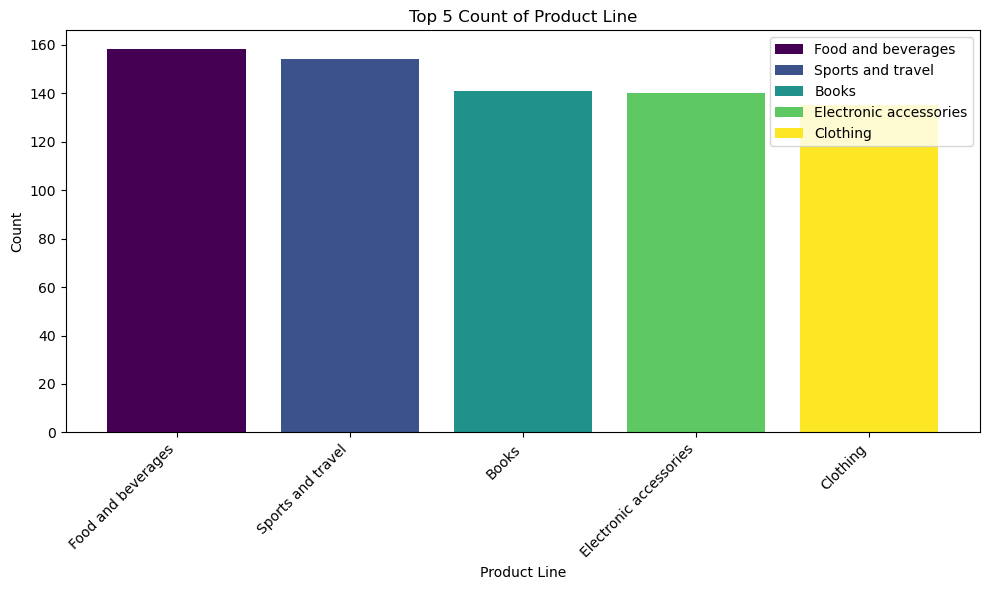

In [96]:
query = "SELECT product_line, count(product_line) as cnt from wmsales group by product_line order by cnt desc limit 5"
df = pd.read_sql(query, cn_var)

colors = plt.cm.viridis(np.linspace(0, 1, len(df)))

plt.figure(figsize=(10, 6))
bars = plt.bar(df['product_line'], df['cnt'], color=colors)

plt.title('Top 5 Count of Product Line')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.legend(bars, df['product_line'])

plt.tight_layout()
plt.show()

Count of payment Method

In [97]:
cursor.execute('select payment_method, count(payment_method) as cnt from wmsales group by payment_method order by cnt desc')
cursor.fetchall()

[('Ewallet', 258),
 ('Walmart Gift Cards', 256),
 ('Credit Card', 246),
 ('Cash', 236)]

Adding New Column to analyse total revenue generated in each month

In [ ]:

cursor.execute('alter table wmsales add month_name varchar(100)')

In [101]:
cursor.execute('alter table wmsales modify column month_name varchar(100)')

In [102]:
cursor.execute('update wmsales set month_name = monthname(date)')

C:\Users\manth\AppData\Local\Temp\ipykernel_15640\669240890.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cn_var)


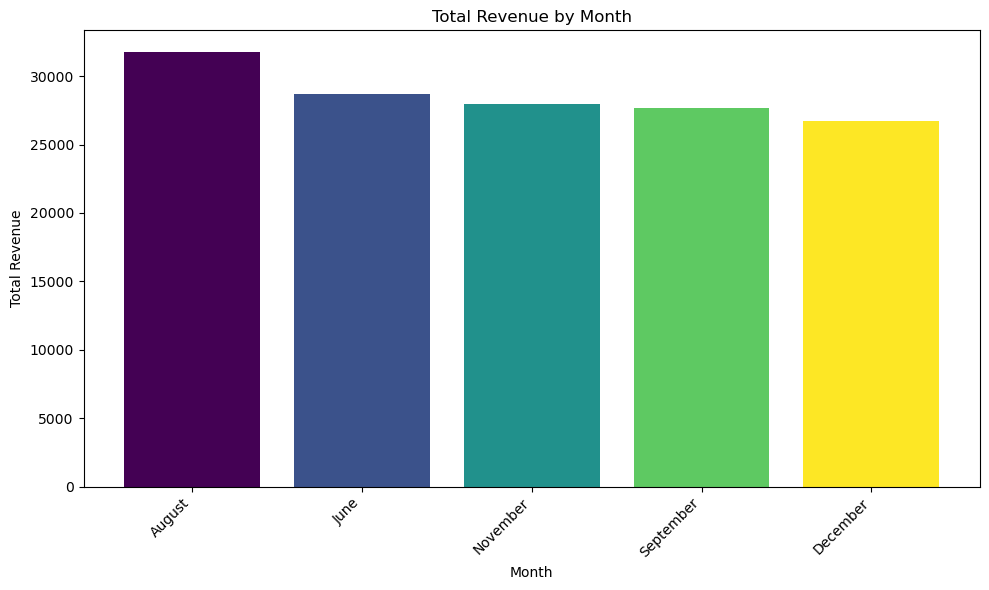

In [103]:
query = 'SELECT month_name as month, sum(total) as Total_Revenue FROM wmsales GROUP BY month_name ORDER BY total_revenue DESC limit 5'
df = pd.read_sql(query, cn_var)

colors = plt.cm.viridis(np.linspace(0, 1, len(df)))

plt.figure(figsize=(10, 6))
plt.bar(df['month'], df['Total_Revenue'], color=colors)
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Cost of Goods Sales in each Month

In [104]:
cursor.execute('select month_name as month, sum(cogs) as cogs from wmsales group by month_name order by cogs desc')
cursor.fetchall()

[('August', Decimal('30245.54')),
 ('June', Decimal('27339.56')),
 ('November', Decimal('26600.94')),
 ('September', Decimal('26337.95')),
 ('December', Decimal('25476.65')),
 ('October', Decimal('25275.34')),
 ('January', Decimal('24455.61')),
 ('April', Decimal('24397.77')),
 ('May', Decimal('23823.15')),
 ('March', Decimal('23222.11')),
 ('July', Decimal('20740.67')),
 ('February', Decimal('15136.06'))]

total revenue genrated in each City

In [105]:
cursor.execute('select city, sum(total) as Total_Revenue from wmsales group by city order by Total_Revenue')
cursor.fetchall()

[('Lucknow', Decimal('10518.9945')),
 ('Indore', Decimal('11687.4765')),
 ('Chandigarh', Decimal('12003.4110')),
 ('Bhopal', Decimal('12584.9535')),
 ('Hyderabad', Decimal('12675.1380')),
 ('Jaipur', Decimal('12938.4045')),
 ('Vadodara', Decimal('13398.0210')),
 ('Vishakhapatnam', Decimal('14087.6295')),
 ('Bangalore', Decimal('14092.2705')),
 ('Pune', Decimal('14272.0620')),
 ('Nashik', Decimal('14412.0585')),
 ('Nagpur', Decimal('15359.4105')),
 ('Surat', Decimal('15694.7490')),
 ('Kochi', Decimal('16962.0465')),
 ('Kolkata', Decimal('17988.7680')),
 ('New Delhi', Decimal('18534.8520')),
 ('Agra', Decimal('18757.7040')),
 ('Chennai', Decimal('19139.1795')),
 ('Ahmedabad', Decimal('20033.9475')),
 ('Mumbai', Decimal('22562.8410'))]

C:\Users\manth\AppData\Local\Temp\ipykernel_15640\3241366548.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cn_var)


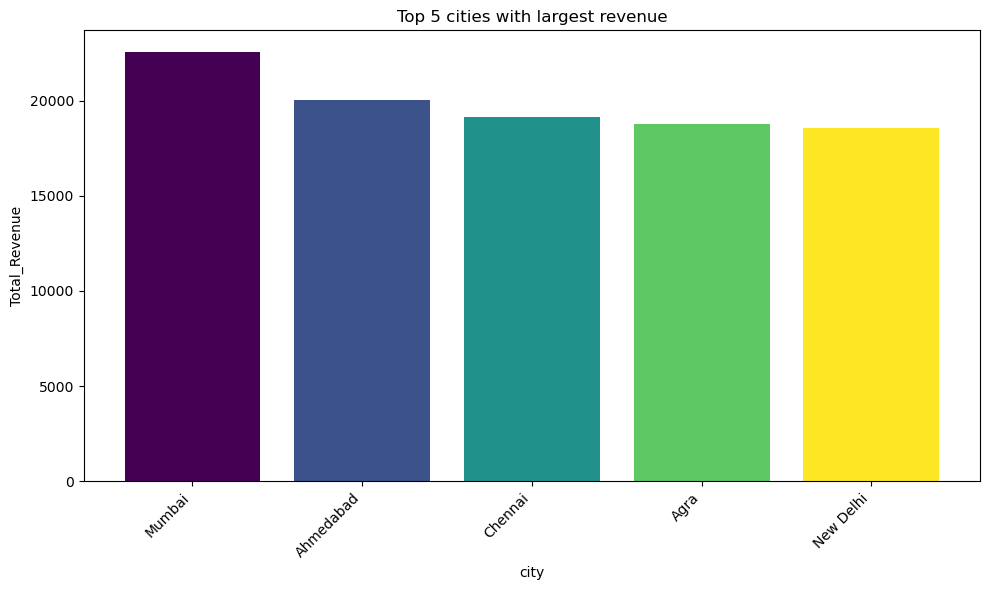

In [106]:
query = "select city, sum(total) as Total_Revenue from wmsales group by city order by Total_Revenue DESC limit 5"
df = pd.read_sql(query, cn_var)

colors = plt.cm.viridis(np.linspace(0, 1, len(df)))

plt.figure(figsize=(10, 6))
plt.bar(df['city'], df['Total_Revenue'], color=colors)
plt.title('Top 5 cities with largest revenue')
plt.xlabel('city')
plt.ylabel('Total_Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

sum of Value Added Tax in each product line

In [107]:
cursor.execute('select product_line, sum(vat) as Valuable_Tax from wmsales group by product_line order by Valuable_Tax DESC')
cursor.fetchall()

[('Sports and travel', 2291.2615),
 ('Electronic accessories', 2212.4005),
 ('Food and beverages', 2164.8045),
 ('Health and beauty', 2058.654),
 ('Clothing', 2034.7085),
 ('Books', 2032.612),
 ('Home and lifestyle', 1858.1265)]

Product Line analysis based on Gender 

In [108]:
cursor.execute('select gender, product_line, count(gender) as total_count from wmsales group by gender, product_line order by total_count desc')
cursor.fetchall()

[('Male', 'Food and beverages', 82),
 ('Female', 'Sports and travel', 81),
 ('Female', 'Books', 80),
 ('Female', 'Home and lifestyle', 79),
 ('Male', 'Electronic accessories', 78),
 ('Male', 'Health and beauty', 78),
 ('Female', 'Food and beverages', 76),
 ('Male', 'Clothing', 75),
 ('Male', 'Sports and travel', 73),
 ('Female', 'Electronic accessories', 62),
 ('Male', 'Books', 61),
 ('Female', 'Clothing', 60),
 ('Female', 'Health and beauty', 56),
 ('Male', 'Home and lifestyle', 55)]

Average rating given by customer for each product line

In [109]:
cursor.execute('select round(avg (rating), 2) as avg_rating, product_line from wmsales group by product_line order by avg_rating DESC')
cursor.fetchall()

[(5.74, 'Electronic accessories'),
 (5.62, 'Sports and travel'),
 (5.58, 'Books'),
 (5.51, 'Food and beverages'),
 (5.48, 'Clothing'),
 (5.25, 'Health and beauty'),
 (5.08, 'Home and lifestyle')]

total revenue generated by customer type

In [110]:
cursor.execute('select customer_type, round(sum(total), 2) as total_revenue from wmsales group by customer_type order by total_revenue desc')
cursor.fetchall()

[('Member', Decimal('155494.78')), ('Normal', Decimal('152209.13'))]

to check gender count in specific branch 

In [111]:
cursor.execute('select gender, count(*) as gender_count_in_C from wmsales where branch = "C" group by gender order by gender_count_in_C desc')
cursor.fetchall()

[('Male', 101), ('Female', 97)]

Total spending of each customer

In [112]:
cursor.execute('select customer_name, sum(total) as total_spending from wmsales group by customer_name order by total_spending')
cursor.fetchall()

[('Harshit Patel', Decimal('29.2425')),
 ('Pihu Gupta', Decimal('33.9885')),
 ('Manoj Sharma', Decimal('67.5990')),
 ('Dia Mehta', Decimal('162.5400')),
 ('Divisha Kapoor', Decimal('204.1095')),
 ('Zain Khan', Decimal('233.4465')),
 ('Amar Singh', Decimal('246.0045')),
 ('Risha Joshi', Decimal('247.2120')),
 ('Eshita Singh', Decimal('262.6050')),
 ('Bhuvan Chauhan', Decimal('292.5090')),
 ('Vanshika Gupta', Decimal('303.2715')),
 ('Tushar Sahu', Decimal('303.7125')),
 ('Aarav Kumar', Decimal('315.7245')),
 ('Lavanya Sharma', Decimal('349.1775')),
 ('Lokesh Tiwari', Decimal('411.6420')),
 ('Aniket Yadav', Decimal('416.8920')),
 ('Ishaani Sahu', Decimal('440.5800')),
 ('Prakash Sahu', Decimal('444.1605')),
 ('Devanshi Tiwari', Decimal('479.0310')),
 ('Veda Singh', Decimal('479.9235')),
 ('Sagar Mehta', Decimal('494.6865')),
 ('Ishan Verma', Decimal('579.9150')),
 ('Chirag Kapoor', Decimal('583.7370')),
 ('Ekta Joshi', Decimal('604.3275')),
 ('Imran Khan', Decimal('617.9775')),
 ('Tanuj M

C:\Users\manth\AppData\Local\Temp\ipykernel_15640\3164010937.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cn_var)


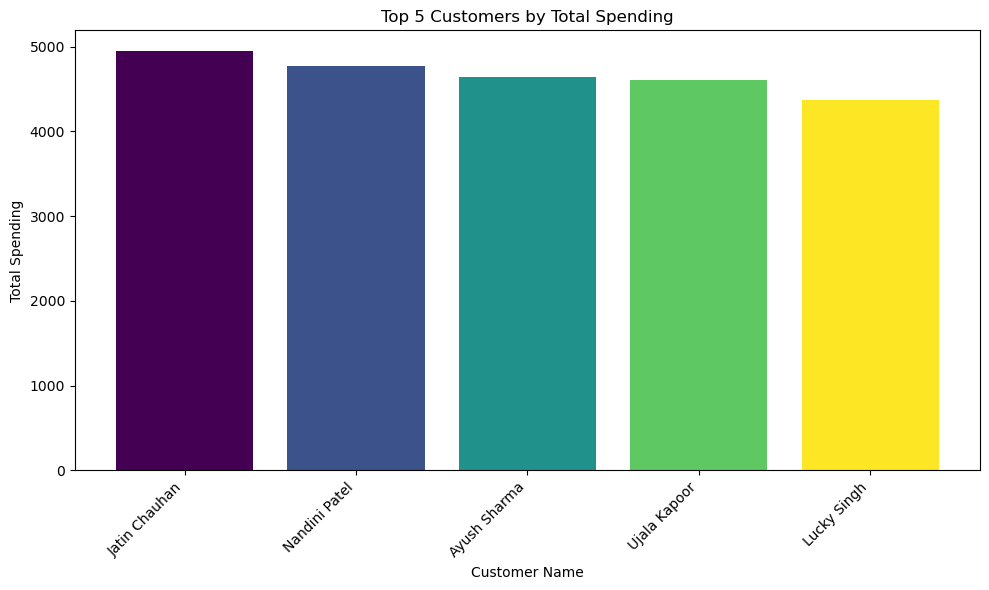

In [113]:
query = "SELECT customer_name, SUM(total) as total_spending FROM wmsales GROUP BY customer_name ORDER BY total_spending DESC LIMIT 5"
df = pd.read_sql(query, cn_var)

colors = plt.cm.viridis(np.linspace(0, 1, len(df)))

plt.figure(figsize=(10, 6))
plt.bar(df['customer_name'], df['total_spending'], color=colors)
plt.title('Top 5 Customers by Total Spending')
plt.xlabel('Customer Name')
plt.ylabel('Total Spending')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [114]:
cursor.execute('select customer_type, gender, payment_method, count(*) as payment_count from wmsales group by customer_type, gender, payment_method order by customer_type, gender, payment_count desc')
cursor.fetchall()

[('Member', 'Female', 'Ewallet', 70),
 ('Member', 'Female', 'Walmart Gift Cards', 63),
 ('Member', 'Female', 'Cash', 60),
 ('Member', 'Female', 'Credit Card', 53),
 ('Member', 'Male', 'Credit Card', 70),
 ('Member', 'Male', 'Walmart Gift Cards', 65),
 ('Member', 'Male', 'Cash', 62),
 ('Member', 'Male', 'Ewallet', 56),
 ('Normal', 'Female', 'Ewallet', 69),
 ('Normal', 'Female', 'Credit Card', 62),
 ('Normal', 'Female', 'Walmart Gift Cards', 60),
 ('Normal', 'Female', 'Cash', 57),
 ('Normal', 'Male', 'Walmart Gift Cards', 68),
 ('Normal', 'Male', 'Ewallet', 63),
 ('Normal', 'Male', 'Credit Card', 61),
 ('Normal', 'Male', 'Cash', 57)]

In [115]:
cursor.execute('select city, product_line, count(*) as preference_count from wmsales group by city, product_line order by city, preference_count desc')
cursor.fetchall()

[('Agra', 'Food and beverages', 11),
 ('Agra', 'Sports and travel', 10),
 ('Agra', 'Home and lifestyle', 9),
 ('Agra', 'Clothing', 7),
 ('Agra', 'Electronic accessories', 7),
 ('Agra', 'Books', 5),
 ('Agra', 'Health and beauty', 4),
 ('Ahmedabad', 'Sports and travel', 13),
 ('Ahmedabad', 'Electronic accessories', 11),
 ('Ahmedabad', 'Health and beauty', 10),
 ('Ahmedabad', 'Clothing', 9),
 ('Ahmedabad', 'Home and lifestyle', 7),
 ('Ahmedabad', 'Books', 7),
 ('Ahmedabad', 'Food and beverages', 6),
 ('Bangalore', 'Clothing', 9),
 ('Bangalore', 'Electronic accessories', 8),
 ('Bangalore', 'Sports and travel', 7),
 ('Bangalore', 'Food and beverages', 7),
 ('Bangalore', 'Books', 6),
 ('Bangalore', 'Home and lifestyle', 6),
 ('Bangalore', 'Health and beauty', 5),
 ('Bhopal', 'Clothing', 10),
 ('Bhopal', 'Health and beauty', 9),
 ('Bhopal', 'Books', 8),
 ('Bhopal', 'Electronic accessories', 6),
 ('Bhopal', 'Home and lifestyle', 6),
 ('Bhopal', 'Food and beverages', 5),
 ('Bhopal', 'Sports and

In [116]:
cursor.execute('select city, product_line, count(*) as preference_count from wmsales where city = "pune" group by city, product_line order by city, preference_count desc')
cursor.fetchall()

[('Pune', 'Electronic accessories', 8),
 ('Pune', 'Health and beauty', 8),
 ('Pune', 'Clothing', 8),
 ('Pune', 'Food and beverages', 7),
 ('Pune', 'Books', 7),
 ('Pune', 'Sports and travel', 5),
 ('Pune', 'Home and lifestyle', 3)]

In [117]:
cursor.execute('select customer_name, avg(total) as average_spending from wmsales group by customer_name')
cursor.fetchall()

[('Keshav Sharma', Decimal('244.10531250')),
 ('Lucky Singh', Decimal('397.88318182')),
 ('Farhan Khan', Decimal('233.96730000')),
 ('Lavisha Kapoor', Decimal('205.07970000')),
 ('Yuvraj Yadav', Decimal('345.42900000')),
 ('Hrishikesh Kapoor', Decimal('581.46550000')),
 ('Pari Chauhan', Decimal('254.42550000')),
 ('Zara Tiwari', Decimal('336.14850000')),
 ('Govind Tiwari', Decimal('231.44665385')),
 ('Mohan Patel', Decimal('190.49520000')),
 ('Rithika Joshi', Decimal('212.12310000')),
 ('Himanshu Kapoor', Decimal('245.31750000')),
 ('Veda Singh', Decimal('119.98087500')),
 ('Aryan Gupta', Decimal('260.13960000')),
 ('Bhavika Kapoor', Decimal('285.97950000')),
 ('Omkar Mehta', Decimal('394.08600000')),
 ('Harsh Joshi', Decimal('458.66100000')),
 ('Aaradhya Yadav', Decimal('267.95737500')),
 ('Ojasvi Tiwari', Decimal('313.86250000')),
 ('Kunal Gupta', Decimal('246.82466667')),
 ('Kanika Singh', Decimal('575.29500000')),
 ('Urvashi Joshi', Decimal('424.95075000')),
 ('Karan Joshi', Decima

In [118]:
cursor.execute('SELECT city, customer_name, total_spending FROM (SELECT city, customer_name, SUM(total) AS total_spending, ROW_NUMBER() OVER (PARTITION BY city ORDER BY SUM(total) DESC) AS spending_rank FROM wmsales GROUP BY city, customer_name) ranked_customers WHERE spending_rank = 1')
cursor.fetchall()

[('Agra', 'Sanya Verma', Decimal('1296.1410')),
 ('Ahmedabad', 'Hema Sahu', Decimal('1433.8065')),
 ('Bangalore', 'Jai Kapoor', Decimal('903.4200')),
 ('Bhopal', 'Yashvardhan Sharma', Decimal('907.5780')),
 ('Chandigarh', 'Naina Rajput', Decimal('1098.7200')),
 ('Chennai', 'Hrishikesh Kapoor', Decimal('961.1700')),
 ('Hyderabad', 'Omkar Mehta', Decimal('1265.1030')),
 ('Indore', 'Nandini Patel', Decimal('910.6860')),
 ('Jaipur', 'Nandini Patel', Decimal('963.2280')),
 ('Kochi', 'Lucky Singh', Decimal('1500.8385')),
 ('Kolkata', 'Sahil Gupta', Decimal('975.4920')),
 ('Lucknow', 'Rohit Patel', Decimal('1301.0550')),
 ('Mumbai', 'Urvashi Joshi', Decimal('1886.7765')),
 ('Nagpur', 'Ishita Mehta', Decimal('1275.1515')),
 ('Nashik', 'Dheeraj Yadav', Decimal('1349.1450')),
 ('New Delhi', 'Ira Kumar', Decimal('1259.5800')),
 ('Pune', 'Eklavya Verma', Decimal('960.5400')),
 ('Surat', 'Elina Chauhan', Decimal('1050.7980')),
 ('Vadodara', 'Sanika Verma', Decimal('905.8350')),
 ('Vishakhapatnam', 